### NIGERIA-AFRICA TRADE INTERCONNECTEDNESS

This work entails analysis done to investigate Nigeria-Africa trade interconnectedness as a part of my task as a Data Science Fellow at SAIL Innovation Lab.
The data was downloaded from [Ekoanalytics](https://ekoanalytics.net/data).

----------------------------------------------------------------------------------------------------------------

#### BRIEF DATASET SUMMARY
The dataset entails details about Nigeria-Africa trade interconnecteness for year 2019.

Exporting country: Nigeria

Year: 2019

Region: West Africa

Exporting RECS: CENSAD;ECOWAS

Exporting country ISO: nga

Exporting GDP: 4.481204e+11

Exporting GDP Per Capita: 2229.858696

The dataset also consists of about 28 columns and 47,000 rows.

Below are the different columns (Data dictionary).

`N.B` : No data dictionary was included or downloaded from the data source, hence [Chatgpt](https://chatgpt.com) was used to generate the data dictionary including the meaning of the different columns.

- exporting_country_iso: ISO code of the exporting country.

- commodities: Description or name of the traded commodities.

- importing_country_iso: ISO code of the importing country.

- commodity_index: Index or unique identifier for the commodity.

- trade_value: Value of the trade between the exporting and importing countries.

- contig: Binary indicator of whether the countries share a border (1 if yes, 0 if no).

- comlang_off: Binary indicator of whether the countries have a common official language (1 if yes, 0 if no).

- comcol: Binary indicator of whether the countries were ever in a colonial relationship (1 if yes, 0 if no).

- dist: Distance between the capitals of the exporting and importing countries (in kilometers).

- distcap: Distance between the two countries' capitals.

- scaled_sci: Scaled social connectedness index, measuring the social connectivity between countries.

- importing_total_import: Total import value for the importing country.

- commodities_code: Code or classification of the commodity.

- supply: Supply value of the commodity from the exporting country.

- demand: Demand value of the commodity in the importing country.

- commodities_count: Count or number of distinct commodities traded.

- export_value: Total value of exports from the exporting country.

- exporting_country: Name of the exporting country.

- exporting_gdp: GDP of the exporting country.

- exporting_gdp_per_capita: GDP per capita of the exporting country.

- exporting_recs: Regional Economic Communities membership of the exporting country.

- exporting_region: Geographic region of the exporting country.

- importing_country: Name of the importing country.

- importing_gdp: GDP of the importing country.

- importing_gdp_per_capita: GDP per capita of the importing country.

- importing_recs: Regional Economic Communities membership of the importing country.

- importing_region: Geographic region of the importing country.
- year: Year of the trade data.

----------------------------------------------------------------------------------------------------------------

#### DATA CLEANING/EXPLORATION
In this section, we perfoem basic data wrangling and data transformation, we check for null values, duplicates, extremely large values or outliers, unique values.
We do a bit of feature engineering and check for basic statistics. We go ahead to select valuable columns and drop potentially non-needed columns. Lastly, we do a bit of exploratory analysis.

----------------------------------------------------------------------------------------------------------------

#### DATA ANALYSIS/VISUALIZATION

Here, we take a deep dive into our cleaned dataset.

We center our analysis around the trade_value, we make efforts to answer the following questions:

What are the least commodities contributing to trade value?

- Geopolitical factors.

How does sharing a border, common language and having common colonizers affect trade value?

- Economic factors

How does the gdp affect trade value?

- Cultural and Distance Factors

Does distance between the importing and exporting country have any effect on tradevalue?

Does shared cultural indicators affect trade value?

- Supply and Demand Dynamics

How does demand affect the value of trade 

How does the importing gdp of a country affect their demands?

- Regional Economic Communities

What are the top 4 performing regional economic communities by trade value?

What are the top regions by trade value?

--

---------------------------------------------------------------------------------------------------------------

In [61]:
#importing the necessary libraries and customizing our seaborn style and context
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = {
    'milk': '#FFFDD0',        # Milk color
    'deep_brownish_red': '#A52A2A',  # Deep brownish-red color
    'black': '#000000'        # Black color
}

# Set Seaborn style and context
sns.set_style("whitegrid", {'axes.facecolor': custom_palette['milk'], 'figure.facecolor': custom_palette['milk']})
sns.set_context("notebook", font_scale=1.1)

# Customize Matplotlib parameters for thick dark line edges and bold writings
plt.rcParams.update({
    'axes.edgecolor': custom_palette['black'],
    'axes.linewidth': 2,
    'grid.color': '#e5e5e5',  # Light grid lines
    'xtick.color': custom_palette['black'],
    'ytick.color': custom_palette['black'],
    'axes.labelcolor': custom_palette['black'],
    'text.color': custom_palette['black'],
    'axes.titlesize': 'large',
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'axes.labelsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small'
})

print("successful")

successful


In [2]:
#Reading our dataframe
data1= pd.read_excel(r"C:/Users/chiso/Downloads/nigeria_intra_Africa_trade_connectedness.xlsx")
data = data1.copy()  #making a copy of the original dataframe
data.head()

,exporting_country_iso,commodities,importing_country_iso,commodity_index,trade_value,contig,comlang_off,comcol,dist,distcap,...,exporting_gdp,exporting_gdp_per_capita,exporting_recs,exporting_region,importing_country,importing_gdp,importing_gdp_per_capita,importing_recs,importing_region,year
0,nga,Abrasive Powder,ner,100.0,84063569.0,1,0,0,802.7985,736.6656,...,4.481204e+11,2229.858696,CENSAD; ECOWAS,Western Africa,Niger,1.291169e+10,553.895050,CENSAD; ECOWAS,Western Africa,2019
1,nga,Acrylic Polymers,ner,100.0,84063569.0,1,0,0,802.7985,736.6656,...,4.481204e+11,2229.858696,CENSAD; ECOWAS,Western Africa,Niger,1.291169e+10,553.895050,CENSAD; ECOWAS,Western Africa,2019
2,nga,Activated Carbon,ner,100.0,84063569.0,1,0,0,802.7985,736.6656,...,4.481204e+11,2229.858696,CENSAD; ECOWAS,Western Africa,Niger,1.291169e+10,553.895050,CENSAD; ECOWAS,Western Africa,2019
3,nga,Agglomerated Cork,ben,100.0,116353441.0,1,0,0,105.1806,568.2081,...,4.481204e+11,2229.858696,CENSAD; ECOWAS,Western Africa,Benin,1.439071e+10,1219.432672,CENSAD; ECOWAS,Western Africa,2019
4,nga,Air Conditioners,ner,100.0,84063569.0,1,0,0,802.7985,736.6656,...,4.481204e+11,2229.858696,CENSAD; ECOWAS,Western Africa,Niger,1.291169e+10,553.895050,CENSAD; ECOWAS,Western Africa,2019


#### DATA CLEANING/EXPLORATION

In [3]:
#checking brief information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47127 entries, 0 to 47126
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   exporting_country_iso     47127 non-null  object 
 1   commodities               47127 non-null  object 
 2   importing_country_iso     47127 non-null  object 
 3   commodity_index           44639 non-null  float64
 4   trade_value               41273 non-null  float64
 5   contig                    47127 non-null  int64  
 6   comlang_off               47127 non-null  int64  
 7   comcol                    47127 non-null  int64  
 8   dist                      47127 non-null  float64
 9   distcap                   47127 non-null  float64
 10  scaled_sci                44639 non-null  float64
 11  importing_total_import    47127 non-null  int64  
 12  commodities_code          47127 non-null  int64  
 13  supply                    47127 non-null  int64  
 14  demand

our dataset has 28 columns, 47127 rows and different datatypes spanning object, float and integers.

In [4]:
#descriptive statistics of our dataset
data.describe()

,commodity_index,trade_value,contig,comlang_off,comcol,dist,distcap,scaled_sci,importing_total_import,commodities_code,supply,demand,commodities_count,export_value,exporting_gdp,exporting_gdp_per_capita,importing_gdp,importing_gdp_per_capita,year
count,44639.000000,4.127300e+04,47127.000000,47127.000000,47127.000000,47127.000000,47127.000000,44639.000000,47127.000000,47127.000000,4.712700e+04,4.712700e+04,47127.000000,3.907000e+03,4.712700e+04,47127.000000,4.636900e+04,46369.000000,47127.0
mean,88.399683,2.749687e+08,0.071870,0.433170,0.316655,2939.177487,2889.401285,23462.428907,1059.767861,111269.614552,5.215229e+07,1.090441e+07,912.058162,2.995095e+06,4.481204e+11,2229.858969,4.110643e+10,2694.225689,2019.0
std,7.820938,8.437187e+08,0.258275,0.495519,0.465177,1580.175839,1429.732665,24429.406491,107.568320,56897.461161,1.299378e+09,9.713005e+07,67.942270,7.392135e+07,7.005986e-02,0.000092,6.989263e+10,3240.852677,0.0
min,38.109150,3.353500e+04,0.000000,0.000000,0.000000,105.180600,568.208100,1787.000000,704.000000,10102.000000,2.000000e+00,1.000000e+00,650.000000,1.000000e+00,4.481204e+11,2229.858696,4.186374e+08,261.247500,2019.0
25%,84.639080,1.646700e+05,0.000000,0.000000,0.000000,1694.203000,1717.000000,8494.000000,997.000000,62935.000000,4.094000e+03,4.532900e+04,882.000000,1.300000e+02,4.481204e+11,2229.859000,4.942319e+09,709.540300,2019.0
50%,90.406240,3.023616e+06,0.000000,0.000000,0.000000,3099.338000,2825.860000,16443.000000,1082.000000,115809.000000,3.545200e+04,4.299910e+05,928.000000,8.320000e+02,4.481204e+11,2229.859000,1.439071e+10,1446.831000,2019.0
75%,92.995730,1.493239e+07,0.000000,1.000000,1.000000,4060.806000,3911.021000,27978.000000,1144.000000,158308.000000,3.562720e+05,3.277244e+06,961.000000,9.041500e+03,4.481204e+11,2229.859000,3.900735e+10,3317.454000,2019.0
max,100.000000,4.042239e+09,1.000000,1.000000,1.000000,6610.806000,6405.342000,117965.000000,1210.000000,219706.000000,4.600006e+10,8.930139e+09,996.000000,3.616351e+09,4.481204e+11,2229.859000,3.514316e+11,17448.270000,2019.0


In [5]:
#checking for the shape of our dataframe
data.shape

(47127, 28)

In [6]:
#checking for null values
data.isnull().sum()

exporting_country_iso           0
commodities                     0
importing_country_iso           0
commodity_index              2488
trade_value                  5854
contig                          0
comlang_off                     0
comcol                          0
dist                            0
distcap                         0
scaled_sci                   2488
importing_total_import          0
commodities_code                0
supply                          0
demand                          0
commodities_count               0
export_value                43220
exporting_country               0
exporting_gdp                   0
exporting_gdp_per_capita        0
exporting_recs                  0
exporting_region                0
importing_country               0
importing_gdp                 758
importing_gdp_per_capita      758
importing_recs                  0
importing_region                0
year                            0
dtype: int64

In [7]:
#checking for unique
data.nunique()

exporting_country_iso           1
commodities                   998
importing_country_iso          52
commodity_index             10814
trade_value                    45
contig                          2
comlang_off                     2
comcol                          2
dist                           52
distcap                        52
scaled_sci                     49
importing_total_import         50
commodities_code              998
supply                        971
demand                      44014
commodities_count              47
export_value                 2445
exporting_country               1
exporting_gdp                   2
exporting_gdp_per_capita        2
exporting_recs                  1
exporting_region                1
importing_country              52
importing_gdp                  68
importing_gdp_per_capita       69
importing_recs                 20
importing_region                5
year                            1
dtype: int64

In [8]:
#checking for the columns in our dataframe
data.columns

Index(['exporting_country_iso', 'commodities', 'importing_country_iso',
       'commodity_index', 'trade_value', 'contig', 'comlang_off', 'comcol',
       'dist', 'distcap', 'scaled_sci', 'importing_total_import',
       'commodities_code', 'supply', 'demand', 'commodities_count',
       'export_value', 'exporting_country', 'exporting_gdp',
       'exporting_gdp_per_capita', 'exporting_recs', 'exporting_region',
       'importing_country', 'importing_gdp', 'importing_gdp_per_capita',
       'importing_recs', 'importing_region', 'year'],
      dtype='object')

Looking at the columns we have in our dataset, we decide to drop some of our columns. First, we drop the exporting country ISO, importing country ISO, exporting region, exporting region, year, and exporting recs as they are redundant columns. We also drop the commodity_index since the commodity_index will not be necessary for our analysis.

In [9]:
data.drop(["exporting_country_iso", "importing_country_iso", "commodity_index", "exporting_region", "year", "exporting_country", "exporting_recs"], axis = 1, inplace=True)
data.columns

Index(['commodities', 'trade_value', 'contig', 'comlang_off', 'comcol', 'dist',
       'distcap', 'scaled_sci', 'importing_total_import', 'commodities_code',
       'supply', 'demand', 'commodities_count', 'export_value',
       'exporting_gdp', 'exporting_gdp_per_capita', 'importing_country',
       'importing_gdp', 'importing_gdp_per_capita', 'importing_recs',
       'importing_region'],
      dtype='object')

In [10]:
#re-checking for the shape of our dataset
data.shape

(47127, 21)

In [11]:
data.duplicated().sum() #checking for duplicates

0

In [12]:
#re-checking for number of uniques
data.nunique()

commodities                   998
trade_value                    45
contig                          2
comlang_off                     2
comcol                          2
dist                           52
distcap                        52
scaled_sci                     49
importing_total_import         50
commodities_code              998
supply                        971
demand                      44014
commodities_count              47
export_value                 2445
exporting_gdp                   2
exporting_gdp_per_capita        2
importing_country              52
importing_gdp                  68
importing_gdp_per_capita       69
importing_recs                 20
importing_region                5
dtype: int64

In [13]:
#re-checking for null 
data.isnull().sum()

commodities                     0
trade_value                  5854
contig                          0
comlang_off                     0
comcol                          0
dist                            0
distcap                         0
scaled_sci                   2488
importing_total_import          0
commodities_code                0
supply                          0
demand                          0
commodities_count               0
export_value                43220
exporting_gdp                   0
exporting_gdp_per_capita        0
importing_country               0
importing_gdp                 758
importing_gdp_per_capita      758
importing_recs                  0
importing_region                0
dtype: int64

We see that more than 80% of our export column have null values. Hence we try to see if we can engineer these values. We investigate to see if the export value can be derived by subtracting the import values from the trade values.

In [14]:
#subseting a range of observation for the required columns from our dataframe
value_subset = data[["trade_value","importing_total_import","export_value"]].iloc[17:54, :]
value_subset.head()

,trade_value,importing_total_import,export_value
17,116353441.0,1027,86.0
18,116353441.0,1027,17492.0
19,84063569.0,925,NaN
20,84063569.0,925,NaN
21,84063569.0,925,NaN


We can see that the export value cannot be obtained from the import value/trade value. Also, we tried to source for data from the internet all to no avail. Lastly, replacing the null values with the mean will be our last option. However, since we do not have enough values in this column, going through this route may lead to bias in our export value column. Therefore, for the sake of our analysis, we will drop the `export_value` column.

In [15]:
data = data.drop('export_value', axis =1) #dropping the export_value column

In [16]:
#cleaning the importing country column.
data.importing_country.replace('C�te d�Ivoire', 'Cote doIvoire', inplace= True)
data.importing_country.unique()

array(['Niger', 'Benin', 'Togo', 'Liberia', 'Ghana', 'Cote doIvoire',
       'Equatorial Guinea', 'Botswana', 'Kenya', 'Zambia', 'Sierra Leone',
       'Congo - Brazzaville', 'Namibia', 'Gambia', 'Mozambique',
       'Cameroon', 'South Africa', 'Tanzania', 'Uganda', 'Chad', 'Gabon',
       'Eswatini', 'Mali', 'Lesotho', 'Burkina Faso',
       'S�o Tom� & Pr�ncipe', 'Burundi', 'Guinea', 'Senegal',
       'Central African Republic', 'Malawi', 'Libya', 'Congo - Kinshasa',
       'Rwanda', 'Guinea-Bissau', 'Seychelles', 'Zimbabwe', 'Mauritius',
       'Angola', 'Mauritania', 'Madagascar', 'Cape Verde', 'Morocco',
       'Egypt', 'Tunisia', 'Comoros', 'Ethiopia', 'Djibouti', 'Algeria',
       'Sudan', 'Somalia', 'South Sudan'], dtype=object)

In [17]:
data.importing_country.replace('S�o Tom� & Pr�ncipe', 'Sao Tome & Principe', inplace= True)

Next, we handle null values.
We start by handling the null values in the trade value column. We fill the null values with the mean of the trade values. To achieve this without bias, since each country have unique trade values, we group our data by country and find the mean trade value of each country. Next we fill our null values with the mean trade value for each instance of every country.

In [18]:
#grouping our import_country by mean of trade value
grouped_import_country = data.groupby("importing_country")["trade_value"].agg("mean")
grouped_import_country

importing_country
Algeria                     1.055715e+06
Angola                      5.662780e+08
Benin                       1.163534e+08
Botswana                    7.609600e+04
Burkina Faso                1.221058e+07
Burundi                     5.943210e+05
Cameroon                    8.885762e+08
Cape Verde                  1.183395e+06
Central African Republic             NaN
Chad                        3.023616e+06
Comoros                              NaN
Congo - Brazzaville         4.186033e+07
Congo - Kinshasa            1.646700e+05
Cote doIvoire               1.421473e+09
Djibouti                             NaN
Egypt                       5.231453e+06
Equatorial Guinea           3.308782e+07
Eswatini                    4.251700e+04
Ethiopia                    3.353500e+04
Gabon                       2.812908e+06
Gambia                      3.767200e+06
Ghana                       4.042239e+09
Guinea                      7.534295e+06
Guinea-Bissau               3.571032e+0

By mere looking, we see that some countries have NAN (null values) as the value of the mean. To understand this better, let us subset our data for any of the countries with NAN mean trade_value.

In [19]:
#subsetting our dataframe to display only observations having Central African Republic as the importing country.
data[data['importing_country']=='Central African Republic']

,commodities,trade_value,contig,comlang_off,comcol,dist,distcap,scaled_sci,importing_total_import,commodities_code,supply,demand,commodities_count,exporting_gdp,exporting_gdp_per_capita,importing_country,importing_gdp,importing_gdp_per_capita,importing_recs,importing_region
12905,Children's Picture Books,NaN,0,0,0,1694.203,1372.741,16443.0,704,104903,1970,27274,650,4.481204e+11,2229.859,Central African Republic,2.220307e+09,467.9074,CENSAD; ECCAS,Central Africa
12906,Cigarette Paper,NaN,0,0,0,1694.203,1372.741,16443.0,704,104813,157,426,650,4.481204e+11,2229.859,Central African Republic,2.220307e+09,467.9074,CENSAD; ECCAS,Central Africa
12907,Malt,NaN,0,0,0,1694.203,1372.741,16443.0,704,21107,751,2400437,650,4.481204e+11,2229.859,Central African Republic,2.220307e+09,467.9074,CENSAD; ECCAS,Central Africa
12908,Recovered Paper,NaN,0,0,0,1694.203,1372.741,16443.0,704,104707,1925,207200,650,4.481204e+11,2229.859,Central African Republic,2.220307e+09,467.9074,CENSAD; ECCAS,Central Africa
12909,Saddlery,NaN,0,0,0,1694.203,1372.741,16443.0,704,84201,26,2567,650,4.481204e+11,2229.859,Central African Republic,2.220307e+09,467.9074,CENSAD; ECCAS,Central Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44517,Legumes,NaN,0,0,0,1694.203,1372.741,16443.0,704,20708,47685,11,650,4.481204e+11,2229.859,Central African Republic,2.220307e+09,467.9074,CENSAD; ECCAS,Central Africa
44519,Corn,NaN,0,0,0,1694.203,1372.741,16443.0,704,21005,2301563,26,650,4.481204e+11,2229.859,Central African Republic,2.220307e+09,467.9074,CENSAD; ECCAS,Central Africa
44544,Soybeans,NaN,0,0,0,1694.203,1372.741,16443.0,704,21201,303742,12,650,4.481204e+11,2229.859,Central African Republic,2.220307e+09,467.9074,CENSAD; ECCAS,Central Africa
44554,Wood Ornaments,NaN,0,0,0,1694.203,1372.741,16443.0,704,94420,854871,13,650,4.481204e+11,2229.859,Central African Republic,2.220307e+09,467.9074,CENSAD; ECCAS,Central Africa


We can now see that the subsetted country has no trade_value (i.e NAN). This accounts for the NAN mean trade value we got in our grouped import country.

Next, we subset our grouped import country to return only values containing NAN as the mean trade_value

In [20]:
#subsetting our grouped import country to return only countries having NAN as their mean trade_value
grouped_import_country_NAN = grouped_import_country[grouped_import_country.isna()]
grouped_import_country_NAN_df = pd.DataFrame(grouped_import_country_NAN) #converting these countries to a dataframe
grouped_import_country_NAN_df


,trade_value
importing_country,
Central African Republic,NaN
Comoros,NaN
Djibouti,NaN
Lesotho,NaN
Mozambique,NaN
Somalia,NaN
South Sudan,NaN


Moving further, we convert these countries with nan values to a list and then remove observations for any of the countries in this list from our data

In [21]:
#converting the importing country column in our grouped_import_country_NAN_df to a list
list_importing_country_grouped_nan = list(grouped_import_country_NAN_df.index)
list_importing_country_grouped_nan

['Central African Republic',
 'Comoros',
 'Djibouti',
 'Lesotho',
 'Mozambique',
 'Somalia',
 'South Sudan']

In [22]:
#dropping observaions having importing countries as any of the country in our nan_list from our data
cleaned_data = data[~data.isin(list_importing_country_grouped_nan).any(axis = 1)]
cleaned_data

,commodities,trade_value,contig,comlang_off,comcol,dist,distcap,scaled_sci,importing_total_import,commodities_code,supply,demand,commodities_count,exporting_gdp,exporting_gdp_per_capita,importing_country,importing_gdp,importing_gdp_per_capita,importing_recs,importing_region
0,Abrasive Powder,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,136805,410,29299,827,4.481204e+11,2229.858696,Niger,1.291169e+10,553.895050,CENSAD; ECOWAS,Western Africa
1,Acrylic Polymers,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,73906,238,2304918,827,4.481204e+11,2229.858696,Niger,1.291169e+10,553.895050,CENSAD; ECOWAS,Western Africa
2,Activated Carbon,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,63802,3662,32882,827,4.481204e+11,2229.858696,Niger,1.291169e+10,553.895050,CENSAD; ECOWAS,Western Africa
3,Agglomerated Cork,116353441.0,1,0,0,105.1806,568.2081,88778.0,1027,94504,601,1175,900,4.481204e+11,2229.858696,Benin,1.439071e+10,1219.432672,CENSAD; ECOWAS,Western Africa
4,Air Conditioners,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,168415,223944,3915794,827,4.481204e+11,2229.858696,Niger,1.291169e+10,553.895050,CENSAD; ECOWAS,Western Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45525,Scent Sprays,164281.0,0,0,1,3328.4840,2844.5210,NaN,1023,209616,15129,1893726,891,4.481204e+11,2229.859000,Sudan,3.051346e+10,441.505600,CENSAD; COMESA; IGAD,Eastern Africa
45526,Vacuum Flask,164281.0,0,0,1,3328.4840,2844.5210,NaN,1023,209617,20263,5316253,891,4.481204e+11,2229.859000,Sudan,3.051346e+10,441.505600,CENSAD; COMESA; IGAD,Eastern Africa
45527,Mannequins,164281.0,0,0,1,3328.4840,2844.5210,NaN,1023,209618,13476,131306,891,4.481204e+11,2229.859000,Sudan,3.051346e+10,441.505600,CENSAD; COMESA; IGAD,Eastern Africa
45528,Paintings,164281.0,0,0,1,3328.4840,2844.5210,NaN,1023,219701,4804339,5471,891,4.481204e+11,2229.859000,Sudan,3.051346e+10,441.505600,CENSAD; COMESA; IGAD,Eastern Africa


In [23]:
#rechecking for null values in our cleaned data
cleaned_data.isnull().sum()

commodities                   0
trade_value                   0
contig                        0
comlang_off                   0
comcol                        0
dist                          0
distcap                       0
scaled_sci                  891
importing_total_import        0
commodities_code              0
supply                        0
demand                        0
commodities_count             0
exporting_gdp                 0
exporting_gdp_per_capita      0
importing_country             0
importing_gdp                 0
importing_gdp_per_capita      0
importing_recs                0
importing_region              0
dtype: int64

Next, we handle the null values in the Scaled_Sci column by following the same process we used in handling the null trade values

In [24]:
#grouping our import_country by mean of scaled_sci
grouped_import_country_ScaledSci = cleaned_data.groupby("importing_country")[["scaled_sci"]].agg("mean")
grouped_import_country_ScaledSci

,scaled_sci
importing_country,
Algeria,1820.0
Angola,8494.0
Benin,88778.0
Botswana,22044.0
Burkina Faso,16720.0
Burundi,14332.0
Cameroon,34659.0
Cape Verde,5616.0
Chad,29157.0


In [25]:
#dropping the country with nan mean value for the scaled_sci column
list_nan = ["Sudan"]
cleaned_data = cleaned_data[~cleaned_data.isin(list_nan).any(axis = 1)]
cleaned_data

,commodities,trade_value,contig,comlang_off,comcol,dist,distcap,scaled_sci,importing_total_import,commodities_code,supply,demand,commodities_count,exporting_gdp,exporting_gdp_per_capita,importing_country,importing_gdp,importing_gdp_per_capita,importing_recs,importing_region
0,Abrasive Powder,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,136805,410,29299,827,4.481204e+11,2229.858696,Niger,1.291169e+10,553.895050,CENSAD; ECOWAS,Western Africa
1,Acrylic Polymers,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,73906,238,2304918,827,4.481204e+11,2229.858696,Niger,1.291169e+10,553.895050,CENSAD; ECOWAS,Western Africa
2,Activated Carbon,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,63802,3662,32882,827,4.481204e+11,2229.858696,Niger,1.291169e+10,553.895050,CENSAD; ECOWAS,Western Africa
3,Agglomerated Cork,116353441.0,1,0,0,105.1806,568.2081,88778.0,1027,94504,601,1175,900,4.481204e+11,2229.858696,Benin,1.439071e+10,1219.432672,CENSAD; ECOWAS,Western Africa
4,Air Conditioners,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,168415,223944,3915794,827,4.481204e+11,2229.858696,Niger,1.291169e+10,553.895050,CENSAD; ECOWAS,Western Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44634,Worked Ivory and Bone,6358916.0,0,0,0,783.6831,1000.7280,16332.0,930,209601,102184,1,833,4.481204e+11,2229.859000,Sao Tome & Principe,4.186374e+08,1946.644000,CENSAD; ECCAS,Central Africa
44635,Forage Crops,82094.0,0,0,0,5590.8030,5415.6640,5909.0,1121,21214,370310,3,943,4.481204e+11,2229.859000,Madagascar,1.411463e+10,523.359100,COMESA; SADC,Eastern Africa
44636,Cocoa Beans,82094.0,0,0,0,5590.8030,5415.6640,5909.0,1121,41801,714785337,2,943,4.481204e+11,2229.859000,Madagascar,1.411463e+10,523.359100,COMESA; SADC,Eastern Africa
44637,Cassava,5231453.0,0,0,0,3917.0520,3414.6710,2491.0,1180,20714,734663,5,979,4.481204e+11,2229.859000,Egypt,3.030923e+11,3019.206000,CENSAD; COMESA,Northern Africa


In [26]:
#rechecking for null values
cleaned_data.isnull().sum()

commodities                 0
trade_value                 0
contig                      0
comlang_off                 0
comcol                      0
dist                        0
distcap                     0
scaled_sci                  0
importing_total_import      0
commodities_code            0
supply                      0
demand                      0
commodities_count           0
exporting_gdp               0
exporting_gdp_per_capita    0
importing_country           0
importing_gdp               0
importing_gdp_per_capita    0
importing_recs              0
importing_region            0
dtype: int64

In [27]:
#checking for unique values
cleaned_data.nunique()

commodities                   998
trade_value                    44
contig                          2
comlang_off                     2
comcol                          2
dist                           44
distcap                        44
scaled_sci                     44
importing_total_import         43
commodities_code              998
supply                        971
demand                      38234
commodities_count              40
exporting_gdp                   2
exporting_gdp_per_capita        2
importing_country              44
importing_gdp                  60
importing_gdp_per_capita       61
importing_recs                 17
importing_region                5
dtype: int64

Looking at the number of unique values in the importing_gdp and importing_gdp_per_capita, we see that they do not correlate with the number of unique importing countries which are 44 in number. Meaning that some countries basically have two or more different gdp's. 

To correct this, we group our data by importing country and filter the result for countries with more than one unique importing_gdp_per_capita values

In [28]:
#grouping the dataset by importing country and importing_gdp_per_capita
unique_gdp_per_country = cleaned_data.groupby('importing_country')['importing_gdp_per_capita'].unique().reset_index()

unique_gdp_per_country

,importing_country,importing_gdp_per_capita
0,Algeria,[3973.964]
1,Angola,[2790.727]
2,Benin,"[1219.43267185875, 1219.433]"
3,Botswana,"[7961.32518123885, 7961.325]"
4,Burkina Faso,[786.8956]
5,Burundi,[261.2475]
6,Cameroon,"[1507.45020591288, 1507.45]"
7,Cape Verde,[3603.782]
8,Chad,[709.5403]
9,Congo - Brazzaville,"[2279.96913053355, 2279.969]"


In [29]:
# Filter countries with multiple unique GDP values
multiple_gdp_countries = unique_gdp_per_country[unique_gdp_per_country['importing_gdp_per_capita'].apply(len) > 1]

print("Countries with multiple unique GDP values:")
multiple_gdp_countries

Countries with multiple unique GDP values:


,importing_country,importing_gdp_per_capita
2,Benin,"[1219.43267185875, 1219.433]"
3,Botswana,"[7961.32518123885, 7961.325]"
6,Cameroon,"[1507.45020591288, 1507.45]"
9,Congo - Brazzaville,"[2279.96913053355, 2279.969]"
11,Cote doIvoire,"[2276.33327906444, 2276.333]"
13,Equatorial Guinea,"[8131.92388810912, 8131.924]"
17,Gambia,"[777.811932084008, 777.8119]"
18,Ghana,"[2202.11556738065, 2202.116]"
21,Kenya,"[1816.5469164389, 1816.547]"
22,Liberia,"[621.892953622715, 621.893]"


We see that countries having multiple importing_gdp_per_capita unique values is as a result of approximation error. To tackle this, we approximate the importing_gdp_per_capita column to the same decimal place.

In [30]:
#rounding the values in the importing_gdp_per_capita column to 1 decimal place
cleaned_data["importing_gdp_per_capita"]=cleaned_data.importing_gdp_per_capita.round(0)
cleaned_data

C:\Users\chiso\AppData\Local\Temp\ipykernel_8552\1109110149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["importing_gdp_per_capita"]=cleaned_data.importing_gdp_per_capita.round(0)


,commodities,trade_value,contig,comlang_off,comcol,dist,distcap,scaled_sci,importing_total_import,commodities_code,supply,demand,commodities_count,exporting_gdp,exporting_gdp_per_capita,importing_country,importing_gdp,importing_gdp_per_capita,importing_recs,importing_region
0,Abrasive Powder,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,136805,410,29299,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
1,Acrylic Polymers,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,73906,238,2304918,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
2,Activated Carbon,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,63802,3662,32882,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
3,Agglomerated Cork,116353441.0,1,0,0,105.1806,568.2081,88778.0,1027,94504,601,1175,900,4.481204e+11,2229.858696,Benin,1.439071e+10,1219.0,CENSAD; ECOWAS,Western Africa
4,Air Conditioners,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,168415,223944,3915794,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44634,Worked Ivory and Bone,6358916.0,0,0,0,783.6831,1000.7280,16332.0,930,209601,102184,1,833,4.481204e+11,2229.859000,Sao Tome & Principe,4.186374e+08,1947.0,CENSAD; ECCAS,Central Africa
44635,Forage Crops,82094.0,0,0,0,5590.8030,5415.6640,5909.0,1121,21214,370310,3,943,4.481204e+11,2229.859000,Madagascar,1.411463e+10,523.0,COMESA; SADC,Eastern Africa
44636,Cocoa Beans,82094.0,0,0,0,5590.8030,5415.6640,5909.0,1121,41801,714785337,2,943,4.481204e+11,2229.859000,Madagascar,1.411463e+10,523.0,COMESA; SADC,Eastern Africa
44637,Cassava,5231453.0,0,0,0,3917.0520,3414.6710,2491.0,1180,20714,734663,5,979,4.481204e+11,2229.859000,Egypt,3.030923e+11,3019.0,CENSAD; COMESA,Northern Africa


In [31]:
#rechecking for unique values again
cleaned_data.nunique()

commodities                   998
trade_value                    44
contig                          2
comlang_off                     2
comcol                          2
dist                           44
distcap                        44
scaled_sci                     44
importing_total_import         43
commodities_code              998
supply                        971
demand                      38234
commodities_count              40
exporting_gdp                   2
exporting_gdp_per_capita        2
importing_country              44
importing_gdp                  60
importing_gdp_per_capita       44
importing_recs                 17
importing_region                5
dtype: int64

We see that the importing_gdp_per_capita column has been corrected. Implementing the same process for the unique values in the importing_gdp column;

In [32]:
cleaned_data["importing_gdp"]=np.around(cleaned_data.importing_gdp, -4)
cleaned_data

C:\Users\chiso\AppData\Local\Temp\ipykernel_8552\1096461999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["importing_gdp"]=np.around(cleaned_data.importing_gdp, -4)


,commodities,trade_value,contig,comlang_off,comcol,dist,distcap,scaled_sci,importing_total_import,commodities_code,supply,demand,commodities_count,exporting_gdp,exporting_gdp_per_capita,importing_country,importing_gdp,importing_gdp_per_capita,importing_recs,importing_region
0,Abrasive Powder,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,136805,410,29299,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
1,Acrylic Polymers,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,73906,238,2304918,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
2,Activated Carbon,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,63802,3662,32882,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
3,Agglomerated Cork,116353441.0,1,0,0,105.1806,568.2081,88778.0,1027,94504,601,1175,900,4.481204e+11,2229.858696,Benin,1.439071e+10,1219.0,CENSAD; ECOWAS,Western Africa
4,Air Conditioners,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,168415,223944,3915794,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44634,Worked Ivory and Bone,6358916.0,0,0,0,783.6831,1000.7280,16332.0,930,209601,102184,1,833,4.481204e+11,2229.859000,Sao Tome & Principe,4.186400e+08,1947.0,CENSAD; ECCAS,Central Africa
44635,Forage Crops,82094.0,0,0,0,5590.8030,5415.6640,5909.0,1121,21214,370310,3,943,4.481204e+11,2229.859000,Madagascar,1.411463e+10,523.0,COMESA; SADC,Eastern Africa
44636,Cocoa Beans,82094.0,0,0,0,5590.8030,5415.6640,5909.0,1121,41801,714785337,2,943,4.481204e+11,2229.859000,Madagascar,1.411463e+10,523.0,COMESA; SADC,Eastern Africa
44637,Cassava,5231453.0,0,0,0,3917.0520,3414.6710,2491.0,1180,20714,734663,5,979,4.481204e+11,2229.859000,Egypt,3.030923e+11,3019.0,CENSAD; COMESA,Northern Africa


In [33]:
#rechecking for number of unique values
cleaned_data.nunique()

commodities                   998
trade_value                    44
contig                          2
comlang_off                     2
comcol                          2
dist                           44
distcap                        44
scaled_sci                     44
importing_total_import         43
commodities_code              998
supply                        971
demand                      38234
commodities_count              40
exporting_gdp                   2
exporting_gdp_per_capita        2
importing_country              44
importing_gdp                  44
importing_gdp_per_capita       44
importing_recs                 17
importing_region                5
dtype: int64

In [34]:
cleaned_data.shape  #rechecking for the shape of our dataset

(40382, 20)

We now have over 40,000 observations and 20 columns

In [35]:
cleaned_data.head(20)

,commodities,trade_value,contig,comlang_off,comcol,dist,distcap,scaled_sci,importing_total_import,commodities_code,supply,demand,commodities_count,exporting_gdp,exporting_gdp_per_capita,importing_country,importing_gdp,importing_gdp_per_capita,importing_recs,importing_region
0,Abrasive Powder,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,136805,410,29299,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
1,Acrylic Polymers,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,73906,238,2304918,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
2,Activated Carbon,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,63802,3662,32882,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
3,Agglomerated Cork,116353441.0,1,0,0,105.1806,568.2081,88778.0,1027,94504,601,1175,900,4.481204e+11,2229.858696,Benin,1.439071e+10,1219.0,CENSAD; ECOWAS,Western Africa
4,Air Conditioners,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,168415,223944,3915794,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
5,Air Pumps,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,168414,1069202,2792879,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
6,Aircraft Parts,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,178803,3885398,6540077,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
7,Alcohol > 80% ABV,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,42207,104842,226354,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
8,Aldehydes,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,62912,673,19038,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
9,Aluminium Bars,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,157604,8608,186919,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa


In [37]:
#viewing brief information of our dataset
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40382 entries, 0 to 44638
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   commodities               40382 non-null  object 
 1   trade_value               40382 non-null  float64
 2   contig                    40382 non-null  int64  
 3   comlang_off               40382 non-null  int64  
 4   comcol                    40382 non-null  int64  
 5   dist                      40382 non-null  float64
 6   distcap                   40382 non-null  float64
 7   scaled_sci                40382 non-null  float64
 8   importing_total_import    40382 non-null  int64  
 9   commodities_code          40382 non-null  int64  
 10  supply                    40382 non-null  int64  
 11  demand                    40382 non-null  int64  
 12  commodities_count         40382 non-null  int64  
 13  exporting_gdp             40382 non-null  float64
 14  exporting_g

In [39]:
# changing datatype

cleaned_data["contig"]=cleaned_data["contig"].astype('object')
cleaned_data["comlang_off"]=cleaned_data["comlang_off"].astype('object')
cleaned_data["comcol"]=cleaned_data["comcol"].astype('object')
cleaned_data["commodities_code"]=cleaned_data["commodities_code"].astype('object')
cleaned_data

C:\Users\chiso\AppData\Local\Temp\ipykernel_8552\3108846807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["contig"]=cleaned_data["contig"].astype('object')
C:\Users\chiso\AppData\Local\Temp\ipykernel_8552\3108846807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["comlang_off"]=cleaned_data["comlang_off"].astype('object')
C:\Users\chiso\AppData\Local\Temp\ipykernel_8552\3108846807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,commodities,trade_value,contig,comlang_off,comcol,dist,distcap,scaled_sci,importing_total_import,commodities_code,supply,demand,commodities_count,exporting_gdp,exporting_gdp_per_capita,importing_country,importing_gdp,importing_gdp_per_capita,importing_recs,importing_region
0,Abrasive Powder,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,136805,410,29299,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
1,Acrylic Polymers,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,73906,238,2304918,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
2,Activated Carbon,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,63802,3662,32882,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
3,Agglomerated Cork,116353441.0,1,0,0,105.1806,568.2081,88778.0,1027,94504,601,1175,900,4.481204e+11,2229.858696,Benin,1.439071e+10,1219.0,CENSAD; ECOWAS,Western Africa
4,Air Conditioners,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,168415,223944,3915794,827,4.481204e+11,2229.858696,Niger,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44634,Worked Ivory and Bone,6358916.0,0,0,0,783.6831,1000.7280,16332.0,930,209601,102184,1,833,4.481204e+11,2229.859000,Sao Tome & Principe,4.186400e+08,1947.0,CENSAD; ECCAS,Central Africa
44635,Forage Crops,82094.0,0,0,0,5590.8030,5415.6640,5909.0,1121,21214,370310,3,943,4.481204e+11,2229.859000,Madagascar,1.411463e+10,523.0,COMESA; SADC,Eastern Africa
44636,Cocoa Beans,82094.0,0,0,0,5590.8030,5415.6640,5909.0,1121,41801,714785337,2,943,4.481204e+11,2229.859000,Madagascar,1.411463e+10,523.0,COMESA; SADC,Eastern Africa
44637,Cassava,5231453.0,0,0,0,3917.0520,3414.6710,2491.0,1180,20714,734663,5,979,4.481204e+11,2229.859000,Egypt,3.030923e+11,3019.0,CENSAD; COMESA,Northern Africa


In [40]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40382 entries, 0 to 44638
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   commodities               40382 non-null  object 
 1   trade_value               40382 non-null  float64
 2   contig                    40382 non-null  object 
 3   comlang_off               40382 non-null  object 
 4   comcol                    40382 non-null  object 
 5   dist                      40382 non-null  float64
 6   distcap                   40382 non-null  float64
 7   scaled_sci                40382 non-null  float64
 8   importing_total_import    40382 non-null  int64  
 9   commodities_code          40382 non-null  object 
 10  supply                    40382 non-null  int64  
 11  demand                    40382 non-null  int64  
 12  commodities_count         40382 non-null  int64  
 13  exporting_gdp             40382 non-null  float64
 14  exporting_g

In [41]:
#brief descriptive statistics
cleaned_data.describe()

,trade_value,dist,distcap,scaled_sci,importing_total_import,supply,demand,commodities_count,exporting_gdp,exporting_gdp_per_capita,importing_gdp,importing_gdp_per_capita
count,4.038200e+04,40382.000000,40382.000000,40382.00000,40382.000000,4.038200e+04,4.038200e+04,40382.000000,4.038200e+04,40382.000000,4.038200e+04,40382.000000
mean,2.810321e+08,2754.183665,2740.633830,24710.39421,1075.116611,5.352200e+07,1.200110e+07,921.830717,4.481204e+11,2229.858964,4.587710e+10,2929.993091
std,8.519773e+08,1584.481208,1423.829319,25271.19377,95.450107,1.322073e+09,1.038323e+08,58.302602,7.494670e-02,0.000099,7.360529e+10,3387.645282
min,3.353500e+04,105.180600,568.208100,1787.00000,774.000000,2.000000e+00,1.000000e+00,728.000000,4.481204e+11,2229.858696,4.186400e+08,261.000000
25%,3.976510e+05,1433.933000,1700.411000,9378.00000,1017.000000,3.980000e+03,5.343025e+04,895.000000,4.481204e+11,2229.859000,7.666700e+09,787.000000
50%,3.571032e+06,3073.257000,2747.075000,16332.00000,1103.000000,3.535500e+04,4.996315e+05,939.000000,4.481204e+11,2229.859000,1.599080e+10,1507.000000
75%,3.308782e+07,3909.526000,3596.586000,28073.00000,1147.000000,3.532490e+05,3.686407e+06,968.000000,4.481204e+11,2229.859000,5.209115e+10,3604.000000
max,4.042239e+09,6610.806000,6405.342000,117965.00000,1210.000000,4.600006e+10,8.930139e+09,996.000000,4.481204e+11,2229.859000,3.514316e+11,17448.000000


Since our data analysis report is centered around trade value, let us plot a histogram distribution of trade values.

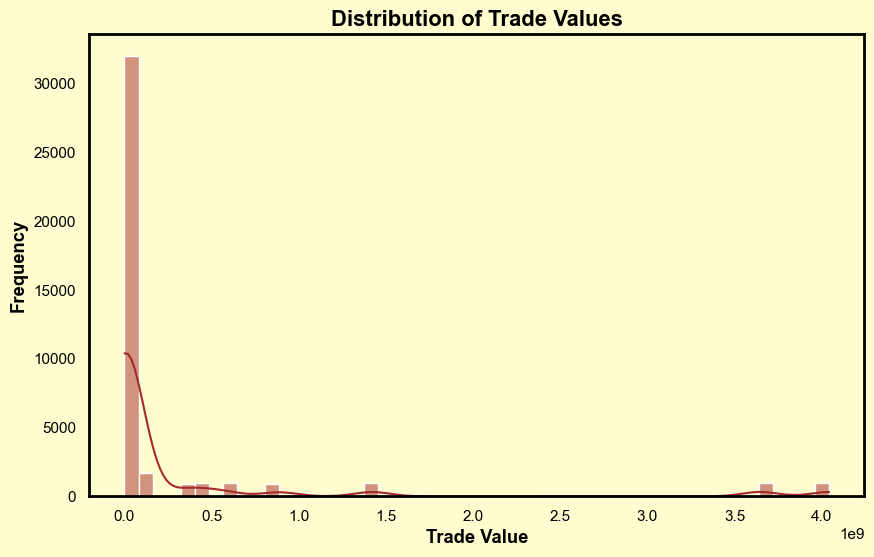

In [62]:
# plotting a histogram of the distribution of trade_values
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['trade_value'], bins=50, kde=True, color=custom_palette['deep_brownish_red'])
plt.title('Distribution of Trade Values', weight='bold')
plt.xlabel('Trade Value')
plt.ylabel('Frequency')
plt.grid(visible= False)
plt.show()

From our descriptive statistics, we see very high deviation in some of our columns, we will use the logarithm scale for these columns so that we can make smaller values more visible and the differences between values more apparent. 


We will do this transformation on the following columns;
- Trade Value
- Scaled Sci
- supply
- demand
- importing_gdp
- importing_gdp_per_capita

In [67]:
cleaned_data['log_trade_value'] = np.log10(cleaned_data['trade_value'])
cleaned_data['log_scaled_sci'] = np.log10(cleaned_data['scaled_sci'])
cleaned_data['log_supply'] = np.log10(cleaned_data['supply'])
cleaned_data['log_demand'] = np.log10(cleaned_data['demand'])
cleaned_data['log_importing_gdp'] = np.log10(cleaned_data['importing_gdp'])
cleaned_data['log_importing_gdp_per_capita'] = np.log10(cleaned_data['importing_gdp_per_capita'])
cleaned_data.head()

C:\Users\chiso\AppData\Local\Temp\ipykernel_8552\2511663557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['log_trade_value'] = np.log10(cleaned_data['trade_value'])
C:\Users\chiso\AppData\Local\Temp\ipykernel_8552\2511663557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['log_scaled_sci'] = np.log10(cleaned_data['scaled_sci'])
C:\Users\chiso\AppData\Local\Temp\ipykernel_8552\2511663557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,commodities,trade_value,contig,comlang_off,comcol,dist,distcap,scaled_sci,importing_total_import,commodities_code,...,importing_gdp,importing_gdp_per_capita,importing_recs,importing_region,log_trade_value,log_scaled_sci,log_supply,log_demand,log_importing_gdp,log_importing_gdp_per_capita
0,Abrasive Powder,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,136805,...,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa,7.924608,5.071753,2.612784,4.466853,10.110983,2.743510
1,Acrylic Polymers,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,73906,...,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa,7.924608,5.071753,2.376577,6.362655,10.110983,2.743510
2,Activated Carbon,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,63802,...,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa,7.924608,5.071753,3.563718,4.516958,10.110983,2.743510
3,Agglomerated Cork,116353441.0,1,0,0,105.1806,568.2081,88778.0,1027,94504,...,1.439071e+10,1219.0,CENSAD; ECOWAS,Western Africa,8.065779,4.948305,2.778874,3.070038,10.158082,3.086004
4,Air Conditioners,84063569.0,1,0,0,802.7985,736.6656,117965.0,925,168415,...,1.291169e+10,554.0,CENSAD; ECOWAS,Western Africa,7.924608,5.071753,5.350139,6.592820,10.110983,2.743510


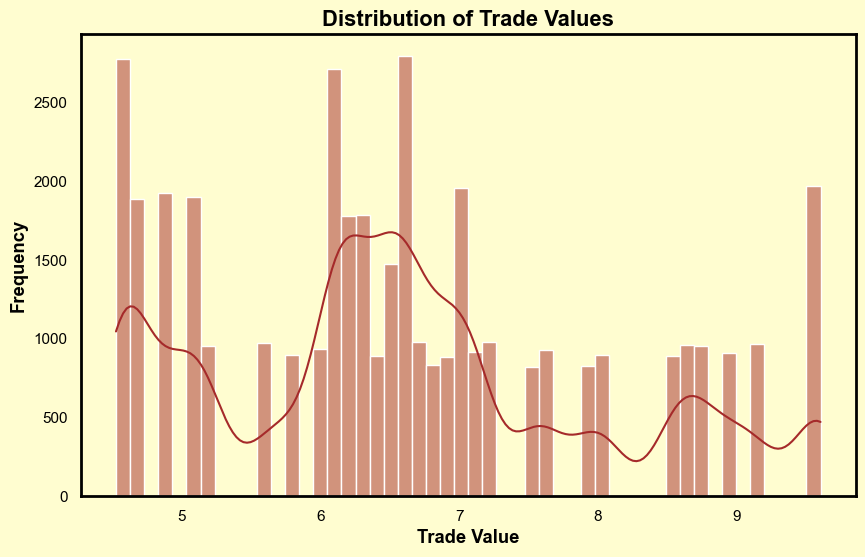

In [69]:
# re-plotting a histogram of the distribution of trade_values
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['log_trade_value'], bins=50, kde=True, color=custom_palette['deep_brownish_red'])
plt.title('Distribution of Trade Values', weight='bold')
plt.xlabel('Trade Value')
plt.ylabel('Frequency')
plt.grid(visible= False)
plt.show()

#### DATA ANALYSIS/VISUALIZATION

In [119]:
from matplotlib.ticker import ScalarFormatter


top_commodities = cleaned_data.groupby('commodities')['trade_value'].sum().sort_values(ascending=False)
top_commodities= pd.DataFrame(top_commodities).reset_index()
top_commodities.sort_values(by = 'trade_value',ascending=False)

,commodities,trade_value
0,Abrasive Powder,1.170175e+10
405,Cooking Hand Tools,1.170175e+10
389,Electric Generating Sets,1.170175e+10
390,Cranes,1.170175e+10
391,Copper Wire,1.170175e+10
...,...,...
993,Zinc Ore,3.693512e+09
994,Tungsten Ore,3.666856e+09
995,Uranium and Thorium Ore,3.656979e+09
996,Glazed Ceramics,2.810112e+09


Least commodities contributing to trade value

                 commodities  trade_value
995                 Zinc Ore     3.693512
922             Tungsten Ore     3.666856
933  Uranium and Thorium Ore     3.656979
292          Glazed Ceramics     2.810112
835                    Slate     1.604995


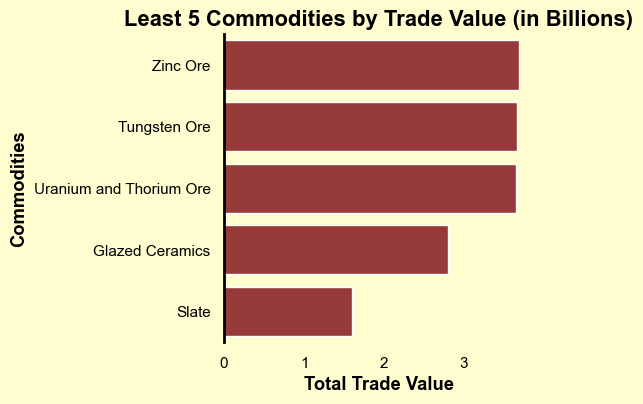

In [126]:
#plotting top 5 commodities by trade value
top_commodities = cleaned_data.groupby('commodities')['trade_value'].sum().reset_index().sort_values(by = 'trade_value', ascending=False).tail(5)
top_commodities['trade_value'] = top_commodities['trade_value']/1e9
print(top_commodities)

plt.figure(figsize=(4,4))
ax = sns.barplot(top_commodities, x =top_commodities['trade_value'], y = top_commodities['commodities'], color=custom_palette['deep_brownish_red'])
plt.title('Least 5 Commodities by Trade Value (in Billion)')
plt.xlabel('Total Trade Value')
plt.ylabel('Commodities')
#plt.yticks(rotation=15)
plt.grid(visible= False)
plt.gca().set_facecolor(custom_palette['milk']) 
sns.despine()
sns.despine(bottom=True)
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()


Regions with the highest trade value


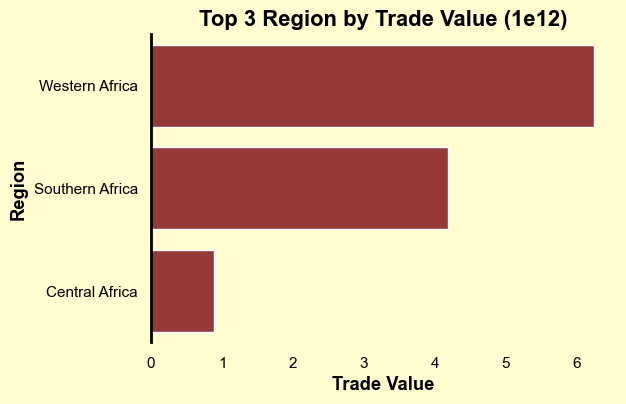

In [189]:
#plotting top 3 region by trade value
trade_by_region = cleaned_data.groupby('importing_region')['trade_value'].sum().reset_index().sort_values(by = 'trade_value', ascending=False).head(3)
trade_by_region['trade_value'] = trade_by_region['trade_value']/1e12


plt.figure(figsize=(6,4))
ax = sns.barplot(trade_by_region, x =trade_by_region['trade_value'], y = trade_by_region['importing_region'], color=custom_palette['deep_brownish_red'])
plt.title('Top 3 Region by Trade Value (1e12)')
plt.xlabel('Trade Value')
plt.ylabel('Region')
#plt.yticks(rotation=15)
plt.grid(visible= False)
plt.gca().set_facecolor(custom_palette['milk']) 
sns.despine()
sns.despine(bottom=True)
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

Top performing regional economic communities by trade value

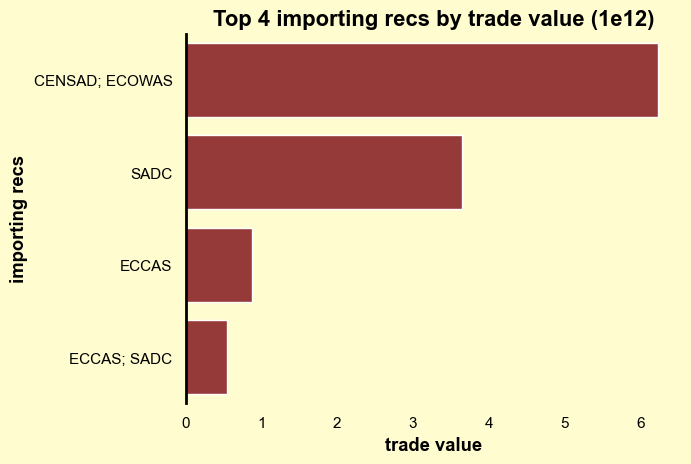

,importing_recs,trade_value
6,CENSAD; ECOWAS,6.230548
16,SADC,3.642163
13,ECCAS,0.877056
14,ECCAS; SADC,0.540229


In [287]:
rec_trade_values = cleaned_data.groupby('importing_recs')['trade_value'].sum().reset_index().sort_values(by = 'trade_value', ascending=False).head(4)
rec_trade_values['trade_value'] = rec_trade_values ['trade_value']/1e12


ax = sns.barplot(rec_trade_values, y=rec_trade_values['importing_recs'], x=rec_trade_values['trade_value'], color=custom_palette['deep_brownish_red'])
plt.xlabel('trade value')
plt.ylabel('importing recs')
plt.title('Top 4 importing recs by trade value (1e12)')
plt.grid(visible= False)
plt.gca().set_facecolor(custom_palette['milk']) 
sns.despine()
sns.despine(bottom=True)
plt.show()


rec_trade_values



- Geopolitical factors.

How sharing a border, common language and having common colonizers affect trade value


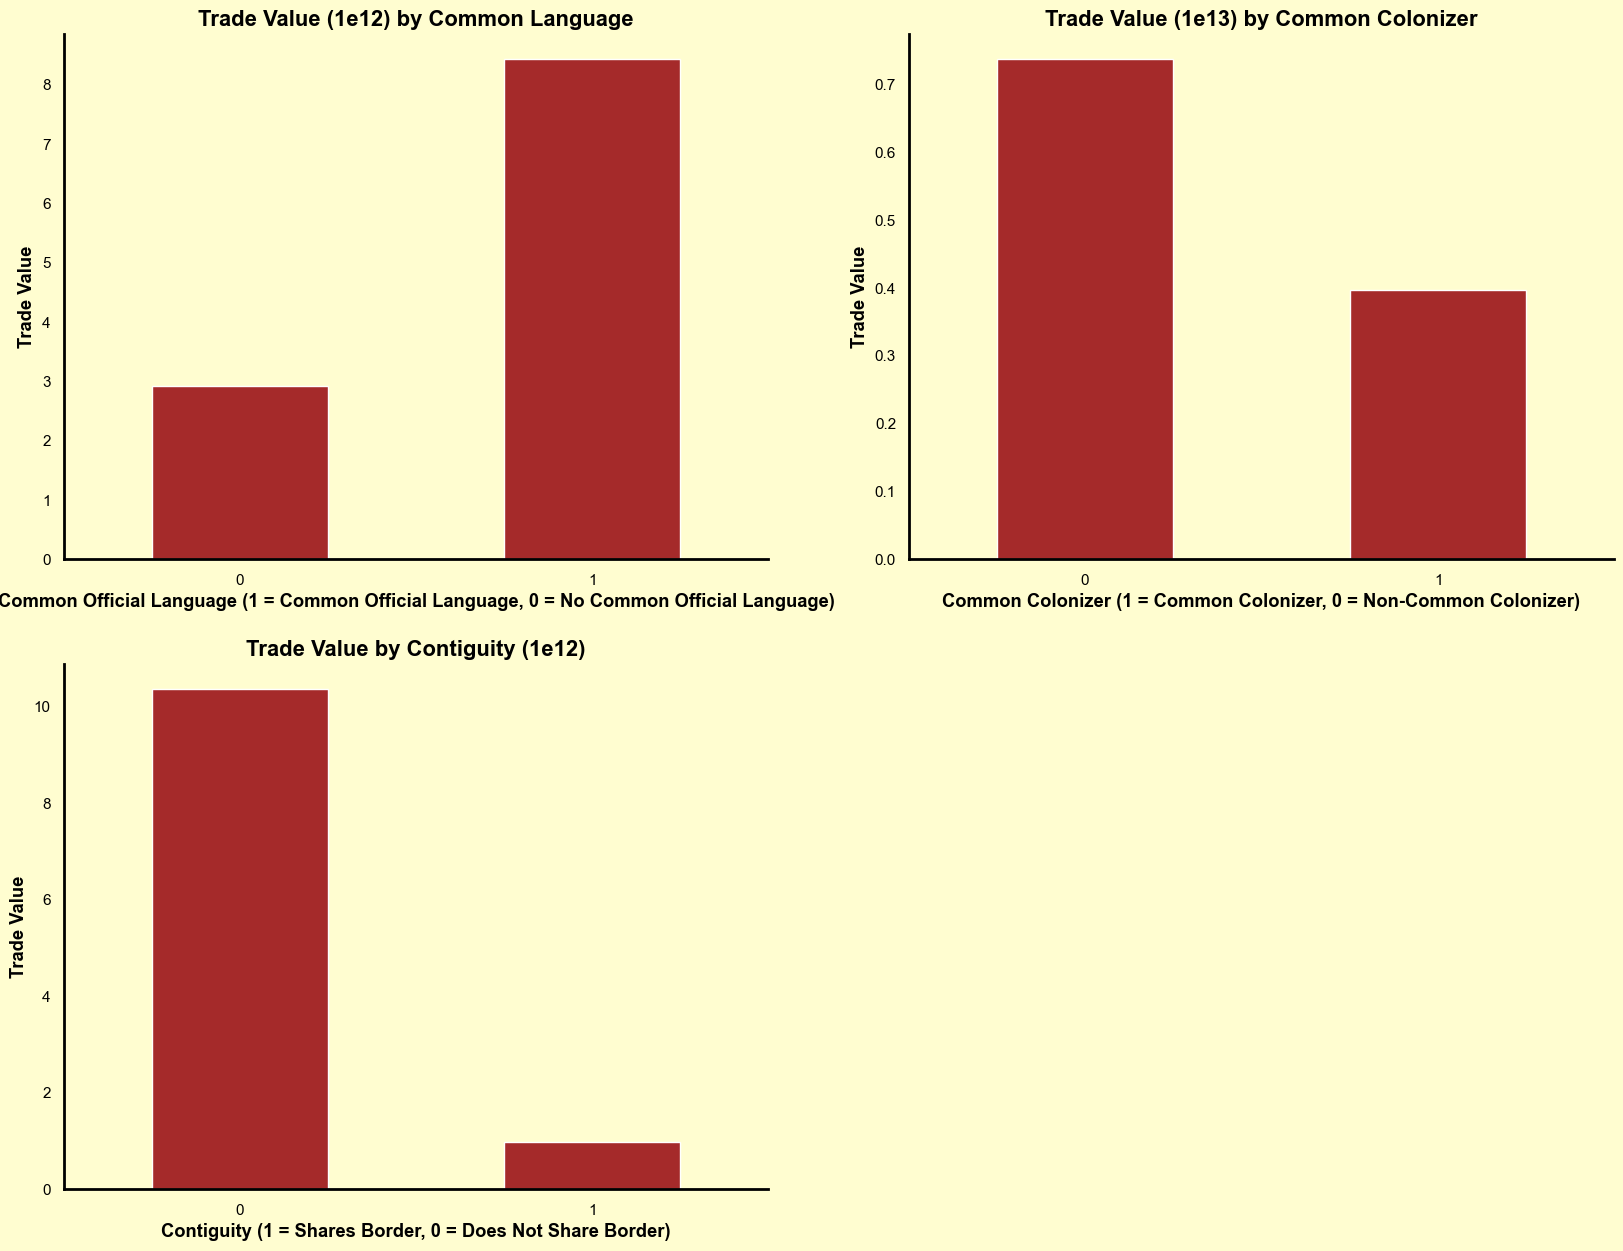

In [195]:
contig_trade_values = cleaned_data.groupby('contig')['trade_value'].sum()
comlang_trade_values = cleaned_data.groupby('comlang_off')['trade_value'].sum()
comcol_trade_values = cleaned_data.groupby('comcol')['trade_value'].sum()

contig_trade_values = contig_trade_values/1e12
comlang_trade_values = comlang_trade_values/1e12
comcol_trade_values = comcol_trade_values/1e13

fig, ax = plt.subplots(2, 2, figsize=(20, 15))

comlang_trade_values.plot(kind='bar', ax=ax[0, 0], color=custom_palette['deep_brownish_red'])
ax[0, 0].set_title('Trade Value (1e12) by Common Language')
ax[0, 0].set_xlabel('Common Official Language (1 = Common Official Language, 0 = No Common Official Language)')
ax[0, 0].set_ylabel('Trade Value')
ax[0, 0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax[0, 0].ticklabel_format(style='plain', axis='x')
ax[0, 0].tick_params(axis='x', rotation=360)

comcol_trade_values.plot(kind='bar', ax=ax[0, 1], color=custom_palette['deep_brownish_red'])
ax[0, 1].set_title('Trade Value (1e13) by Common Colonizer')
ax[0, 1].set_xlabel('Common Colonizer (1 = Common Colonizer, 0 = Non-Common Colonizer)')
ax[0, 1].set_ylabel('Trade Value')
ax[0, 1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax[0, 1].ticklabel_format(style='plain', axis='x')
ax[0, 1].tick_params(axis='x', rotation=360)

contig_trade_values.plot(kind='bar', ax=ax[1, 0], color=custom_palette['deep_brownish_red'])
ax[1, 0].set_title('Trade Value by Contiguity (1e12)')
ax[1, 0].set_xlabel('Contiguity (1 = Shares Border, 0 = Does Not Share Border)')
ax[1, 0].set_ylabel('Trade Value')
ax[1, 0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax[1, 0].ticklabel_format(style='plain', axis='x')
ax[1, 0].tick_params(axis='x', rotation=360)

# Hide the last subplot (bottom-right) as it's not used
ax[1, 1].axis('off')


# Remove grid lines and set background color for each subplot
for i in range(2):
    for j in range(2):
        ax[i, j].grid(False)
        ax[i, j].set_facecolor(custom_palette['milk'])
        sns.despine(ax=ax[i, j], bottom=True)  
        sns.despine(ax = ax[i, j])


plt.show()

Effect of importing gdp on trade value

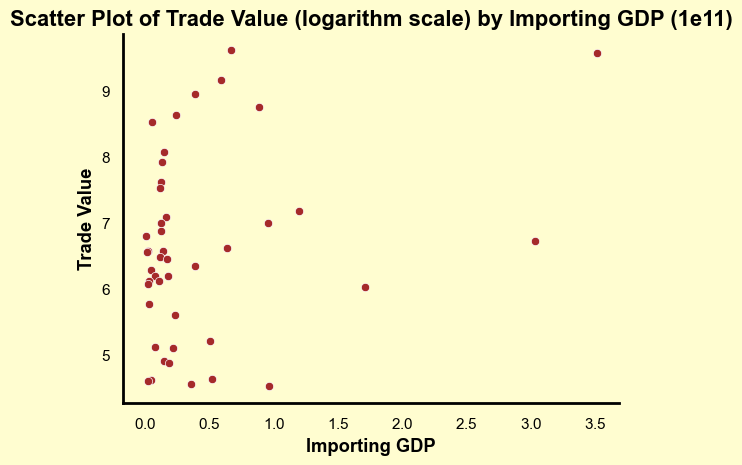

In [207]:
importing_gdp_by_tradeValue= cleaned_data.groupby('importing_gdp')['log_trade_value'].mean().reset_index().sort_values(by = 'log_trade_value', ascending=False)
importing_gdp_by_tradeValue['importing_gdp'] = importing_gdp_by_tradeValue['importing_gdp']/1e11

ax = sns.scatterplot(importing_gdp_by_tradeValue, y=importing_gdp_by_tradeValue['log_trade_value'], x=importing_gdp_by_tradeValue['importing_gdp'], color=custom_palette['deep_brownish_red'])
plt.xlabel('Importing GDP')
plt.ylabel('Trade Value')
plt.title('Scatter Plot of Trade Value (logarithm scale) by Importing GDP (1e11)')
plt.grid(visible= False)
plt.gca().set_facecolor(custom_palette['milk']) 
sns.despine()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

- Cultural and Distance Factors

How the distance between the importing and exporting country have any effect on tradevalue


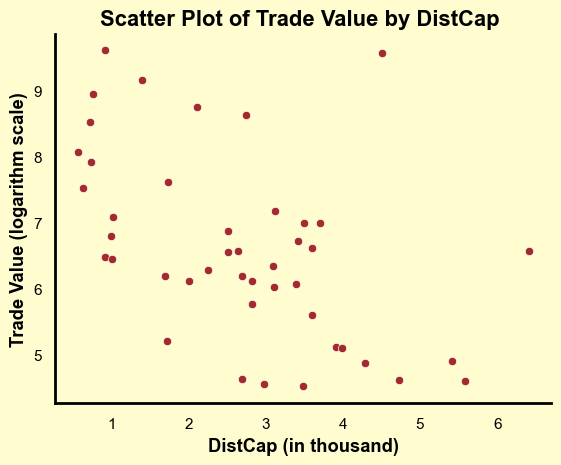

In [212]:
distcap_by_trade_value = cleaned_data.groupby('distcap')['log_trade_value'].mean().reset_index().sort_values(by = 'log_trade_value', ascending=False)
distcap_by_trade_value['distcap'] = distcap_by_trade_value['distcap']/1e3

ax = sns.scatterplot(distcap_by_trade_value, y=distcap_by_trade_value['log_trade_value'], x=distcap_by_trade_value['distcap'], color=custom_palette['deep_brownish_red'])
plt.xlabel('DistCap (in thousand)')
plt.ylabel('Trade Value (logarithm scale)')
plt.title('Scatter Plot of Trade Value by DistCap ')
plt.grid(visible= False)
plt.gca().set_facecolor(custom_palette['milk']) 
sns.despine()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

How shared cultural indicators affect trade value



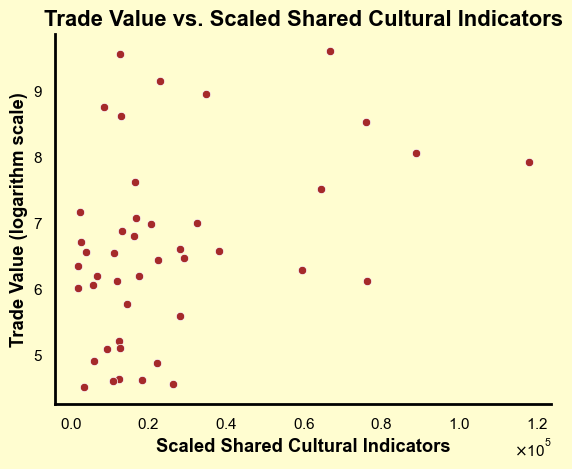

In [214]:
distcap_by_trade_value = cleaned_data.groupby('scaled_sci')['log_trade_value'].mean().reset_index().sort_values(by = 'log_trade_value', ascending=False)
#distcap_by_trade_value['scaled_sci'] = distcap_by_trade_value['distcap']/1e3

ax = sns.scatterplot(distcap_by_trade_value, y=distcap_by_trade_value['log_trade_value'], x=distcap_by_trade_value['scaled_sci'], color=custom_palette['deep_brownish_red'])
plt.xlabel('Scaled Shared Cultural Indicators')
plt.ylabel('Trade Value (logarithm scale)')
plt.title('Trade Value vs. Scaled Shared Cultural Indicators')
plt.grid(visible= False)
plt.gca().set_facecolor(custom_palette['milk']) 
sns.despine()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()


- Supply and Demand Dynamics

Top commodities being supplied

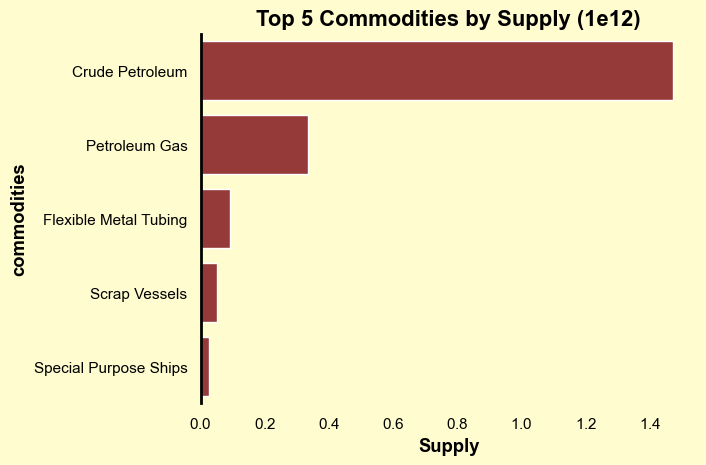

,commodities,supply
185,Crude Petroleum,1.472002
661,Petroleum Gas,0.334598
256,Flexible Metal Tubing,0.092229
812,Scrap Vessels,0.051889
852,Special Purpose Ships,0.027245


In [288]:
importgdp_by_supply = cleaned_data.groupby('commodities')['supply'].sum().reset_index().sort_values(by = 'supply', ascending=False).head()
importgdp_by_supply['supply'] = importgdp_by_supply['supply']/1e12

ax = sns.barplot(importgdp_by_supply, y=importgdp_by_supply['commodities'], x=importgdp_by_supply['supply'], color=custom_palette['deep_brownish_red'])
plt.xlabel('Supply')
plt.ylabel('commodities')
plt.title('Top 5 Commodities by Supply (1e12)')
plt.grid(visible= False)
plt.gca().set_facecolor(custom_palette['milk']) 
sns.despine()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
sns.despine(bottom=True)
plt.show()

importgdp_by_supply

Least commodities being supplied

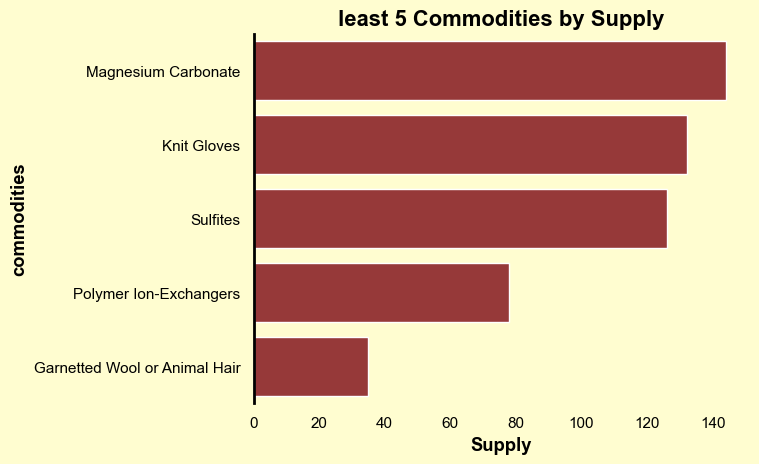

,commodities,supply
449,Magnesium Carbonate,144
390,Knit Gloves,132
872,Sulfites,126
693,Polymer Ion-Exchangers,78
274,Garnetted Wool or Animal Hair,35


In [289]:
importgdp_by_supply = cleaned_data.groupby('commodities')['supply'].sum().reset_index().sort_values(by = 'supply', ascending=False).tail()
#distcap_by_trade_value['scaled_sci'] = distcap_by_trade_value['distcap']/1e3

ax = sns.barplot(importgdp_by_supply, y=importgdp_by_supply['commodities'], x=importgdp_by_supply['supply'], color=custom_palette['deep_brownish_red'])
plt.xlabel('Supply')
plt.ylabel('commodities')
plt.title('least 5 Commodities by Supply')
plt.grid(visible= False)
plt.gca().set_facecolor(custom_palette['milk']) 
sns.despine()
sns.despine(bottom=True)
plt.show()

importgdp_by_supply


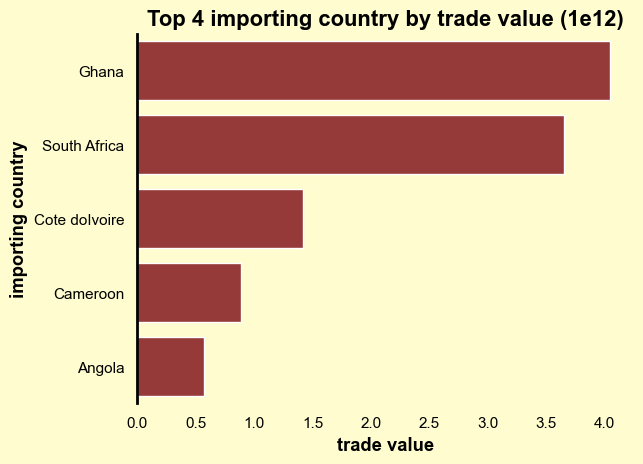

In [291]:
import_country_trade_val = cleaned_data.groupby('importing_country')['trade_value'].mean().reset_index().sort_values(by = 'trade_value', ascending=False).head()
import_country_trade_val['trade_value'] = import_country_trade_val['trade_value']/1e9


ax = sns.barplot(import_country_trade_val, y=import_country_trade_val['importing_country'], x=import_country_trade_val['trade_value'], color=custom_palette['deep_brownish_red'])
plt.xlabel('trade value')
plt.ylabel('importing country')
plt.title('Top 4 importing country by trade value (1e12)')
plt.grid(visible= False)
plt.gca().set_facecolor(custom_palette['milk']) 
sns.despine()
sns.despine(bottom = True)
plt.show()


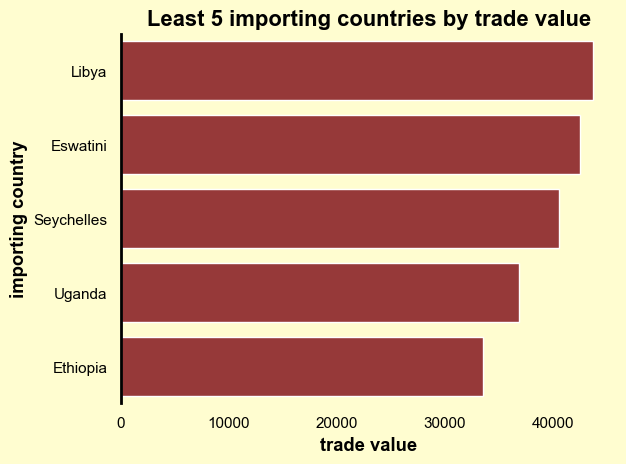

In [292]:
import_country_trade_val = cleaned_data.groupby('importing_country')['trade_value'].mean().reset_index().sort_values(by = 'trade_value', ascending=False).tail()
#import_country_trade_val['trade_value'] = import_country_trade_val['trade_value']/1e-5


ax = sns.barplot(import_country_trade_val, y=import_country_trade_val['importing_country'], x=import_country_trade_val['trade_value'], color=custom_palette['deep_brownish_red'])
plt.xlabel('trade value')
plt.ylabel('importing country')
plt.title('Least 5 importing countries by trade value')
plt.grid(visible= False)
plt.gca().set_facecolor(custom_palette['milk']) 
sns.despine()
sns.despine(bottom = True)
plt.show()


How does the importing gdp of a country affect their demands?

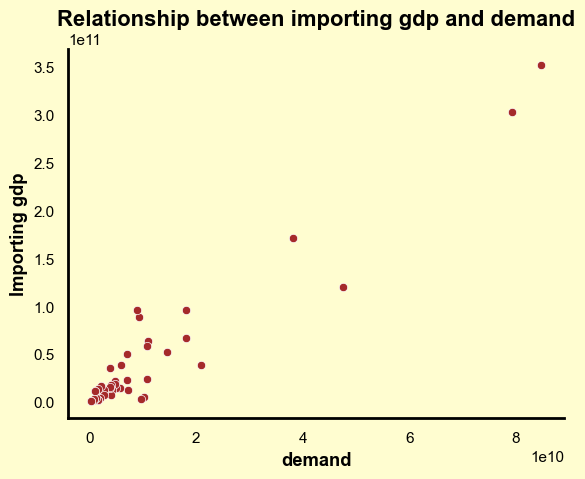

In [293]:
country_gdp_by_demand = cleaned_data.groupby(['importing_country', 'importing_gdp'])['demand'].sum().reset_index().sort_values(by = 'demand', ascending=False)

ax = sns.scatterplot(country_gdp_by_demand, y=country_gdp_by_demand['importing_gdp'], x=country_gdp_by_demand['demand'], color=custom_palette['deep_brownish_red'])
plt.xlabel('demand')
plt.ylabel('Importing gdp')
plt.title('Relationship between importing gdp and demand')
plt.grid(visible= False)
plt.gca().set_facecolor(custom_palette['milk']) 
sns.despine()
sns.despine(left = False)
plt.show()

